# Logistic Regression

## Importing the libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

## Importing the dataset

In [35]:
dataset = pd.read_csv('Social_Network_Ads.csv');
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [36]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [37]:
X[:5,:], len(X)

(array([[19.00, 19000.00],
        [35.00, 20000.00],
        [26.00, 43000.00],
        [27.00, 57000.00],
        [19.00, 76000.00]]), 400)

In [38]:
y[:5], len(y)

(array([0, 0, 0, 0, 0], dtype=int64), 400)

## Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0);

In [41]:
len(X_train), len(X_test)

(300, 100)

## Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler();
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [75]:
X_train[:5,:]

array([[0.58, -0.89],
       [-0.61, 1.46],
       [-0.01, -0.57],
       [-0.61, 1.90],
       [1.37, -1.41]])

In [76]:
X_test[:5,:]

array([[-0.80, 0.50],
       [-0.01, -0.57],
       [-0.31, 0.16],
       [-0.80, 0.27],
       [-0.31, -0.57]])

## Fitting Logistic Regression to the Training set

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting the Test set results

In [64]:
y_pred = classifier.predict(X_test)

In [70]:
y_test[:20], y_pred[:20]

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64))

## Making the Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [95]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

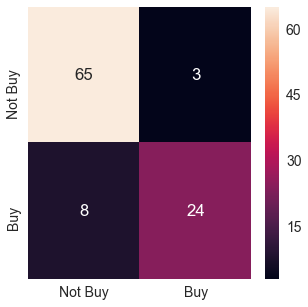

In [96]:
import seaborn as sn
df_cm = pd.DataFrame(cm, index = [i for i in ['Not Buy','Buy']],
                  columns = [i for i in ['Not Buy','Buy']])
plt.figure(figsize = (5,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True)
plt.show()

## Visualising the Training set results

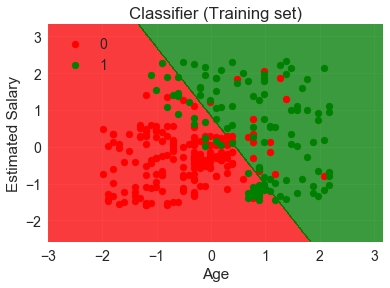

In [97]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


## Visualising the Test set results

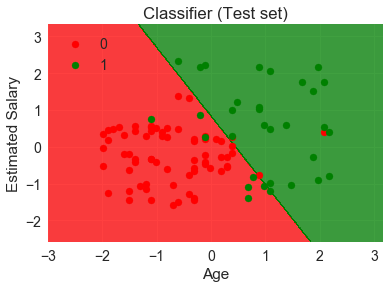

In [99]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()